In [72]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [ ]:
from src.lime_timeseries_optimized import *
from keras.engine.saving import load_model
import time
from matplotlib import pyplot as plt
import matplotlib
import mpld3
import plotly.tools as tls
# select a set of background examples to take an expectation over
training_set = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/train.npy')
x_test = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/test.npy')
MODEL = load_model('/home/justyna/WORKSPACE/heartbeat_classification/src/flask-app/convo_weights.h5')
training_labels = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/train_labels.npy')

In [179]:
instance = training_set[0]
print(type(instance))

print(math.ceil(len(instance) / num_slices))


print(instance.shape)
label = training_labels[0]

def predict(instances):
    labels = []
    for instance in instances:
        instance = np.reshape(instance, newshape=(1, instance.shape[0], 1))
        labels.append(MODEL.predict(instance))
    return np.array(labels).reshape(len(instances), 2)

num_samples = 100
num_slices = 40
num_features = 20

def explain():
    now = time.time()
    explanations = explainer.explain_instance(timeseries=instance,num_features=num_features, training_set=training_set, num_samples=num_samples,num_slices=num_slices, classifier_fn=predict)
    end = time.time()
    execution_time = end - now
    return explanations, execution_time

explainer = LimeTimeSeriesExplanation(feature_selection='auto', verbose=False)

# explanations, execution_time = explain()

<class 'numpy.ndarray'>
250
(10000,)


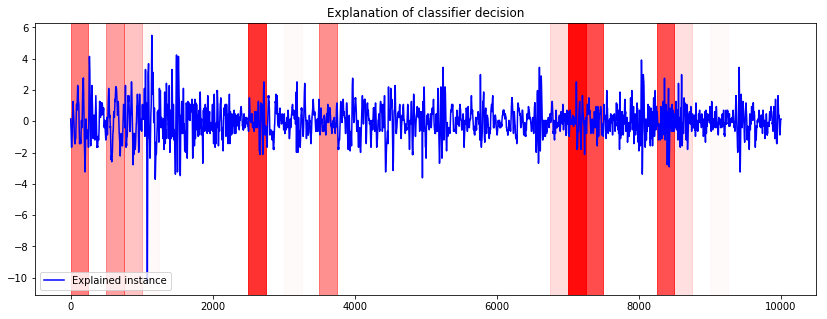

In [166]:
matplotlib.rcParams.update({'font.size': 10})
values_per_slice = math.ceil(len(instance) / num_slices)
plt.figure(figsize=(14,5))
plt.plot(instance, color='b', label='Explained instance')
plt.title("Explanation of classifier decision")
plt.legend(loc='lower left')
exp = explanations[0][1]
for i in range(len(exp)):
    feature, weight = exp[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    plt.axvspan(start , end, color='red', alpha=(abs(weight*10**30)))
f = open("/home/justyna/WORKSPACE/heartbeat_classification/src/flask-app/templates/lime.html", 'w')
fig = plt.gcf()
# plot_url = py.plot_mpl(fig)

In [93]:
a = {'c': 2, 'b': 3}
b = a.copy()

In [196]:
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import normalize

exp = explanations[0][1]

trace = go.Scatter(
    x=np.arange(0,10000,1),
    y=instance,
    mode='lines',
)
data = [trace]
layout = {'title':'Explanation of classifier decision','xaxis':{'title': 'Sample','showgrid': False},'yaxis':{'title': 'Magnitude', 'showgrid': False},'shapes': []}
shape = {'type': 'rect', 'xref': 'x', 'yref': 'paper', 'x0': 0, 'y0':0, 'x1': 0, 'y1':1, 'fillcolor':'#f24d50',
                     'opacity': 0.0, 'line': {'width': 0}, 'layer':'below'}
values_per_slice = math.ceil(len(instance) / num_slices)
weights = [abs(sample[1]) for sample in exp]
normalized_weights = [(weight-min(weights))/(max(weights)-min(weights)) for weight in weights]

for i in range(len(exp)):
    feature, _ = exp[i]
    weight = normalized_weights[i]
    if weight < 0.2:
        weight = 0.1
    start = feature * values_per_slice
    end = start + values_per_slice
    shape1 = shape.copy()
    shape1.update({'x0':start, 'x1': end, 'opacity': weight})
    layout['shapes'].append(shape1)   
py.iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [ ]:
values_per_slice = math.ceil(len(instance) / num_slices)
plt.figure(figsize=(20,10))
plt.plot(instance, color='b', label='Explained instance')
# plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower left')
exp = explanations[1][1]
for i in range(10):
    feature, weight = exp[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    print(weight)
    plt.axvspan(start , end, color='red', alpha=(abs(weight*(10**20))))